In [18]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [64]:
spine_df = pd.read_json('data/criterion_list.json')
info_df = pd.read_json('data/criterion_movie_info.json')

df = pd.merge(spine_df, info_df, on='url', how='left')

del spine_df
del info_df

In [12]:
df.head()

,country,director,spine_number,title,url,year_of_release,aspect_ratio,blurb,cast,colour,credits,date_scraped,formats,language,run_time,time_scraped
0,"France,",Jean-Luc Godard,482,2 or 3 Things I Know About Her,https://www.criterion.com/films/1333-2-or-3-th...,1967,2.35:1,In 2 or 3 Things I Know About Her (2 ou 3 chos...,"Marina Vlady, Anny Duperey, Joseph Gerhard, Ro...",Color,Director Jean-Luc Godard Screenplay Jean-Luc G...,20122020,DVD,French,87 minutes,213735
1,"United States,",Delmer Daves,657,3:10 to Yuma,https://www.criterion.com/films/27910-3-10-to-...,1957,1.85:1,"In this beautifully shot, psychologically comp...","Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",Black & White,Director Delmer Daves Produced by David Heilwe...,20122020,"Blu-Ray, DVD",English,92 minutes,213735
2,,,327,3 Films by Louis Malle,https://www.criterion.com/boxsets/397-3-films-...,,,Few directors have portrayed the agonies and e...,,,,20122020,DVD,,,213735
3,,,672,3 Films by Roberto Rossellini Starring Ingrid ...,https://www.criterion.com/boxsets/982-3-films-...,,,"In the late 1940s, the incandescent Hollywood ...",,,,20122020,"Blu-Ray, DVD",,,213735
4,,,528,3 Silent Classics by Josef von Sternberg,https://www.criterion.com/boxsets/744-3-silent...,,,"Vienna-born, New York-raised Josef von Sternbe...",,,,20122020,Blu-Ray,,,213735


In [14]:
list(df.columns)

['country',
 'director',
 'spine_number',
 'title',
 'url',
 'year_of_release',
 'aspect_ratio',
 'blurb',
 'cast',
 'colour',
 'credits',
 'date_scraped',
 'formats',
 'language',
 'run_time',
 'time_scraped']

we dont need scrape time variables for this investigation since non of the info is time sensitive

In [65]:
df.drop(['date_scraped', 'time_scraped'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 1440
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          1441 non-null   object
 1   director         1441 non-null   object
 2   spine_number     1441 non-null   object
 3   title            1441 non-null   object
 4   url              1441 non-null   object
 5   year_of_release  1441 non-null   object
 6   aspect_ratio     1441 non-null   object
 7   blurb            1441 non-null   object
 8   cast             1441 non-null   object
 9   colour           1441 non-null   object
 10  credits          1441 non-null   object
 11  date_scraped     1441 non-null   int64 
 12  formats          1441 non-null   object
 13  language         1441 non-null   object
 14  run_time         1441 non-null   object
 15  time_scraped     1441 non-null   int64 
dtypes: int64(2), object(14)
memory usage: 191.4+ KB


**looks like the empty values aren't currently registering as NULL** 

to solve this i will replace empty strings with NULL value

In [66]:
df.replace('', np.NaN, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 0 to 1440
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          1320 non-null   object
 1   director         1319 non-null   object
 2   spine_number     1071 non-null   object
 3   title            1441 non-null   object
 4   url              1441 non-null   object
 5   year_of_release  1312 non-null   object
 6   aspect_ratio     1314 non-null   object
 7   blurb            1441 non-null   object
 8   cast             1320 non-null   object
 9   colour           1313 non-null   object
 10  credits          1276 non-null   object
 11  formats          997 non-null    object
 12  language         1306 non-null   object
 13  run_time         1321 non-null   object
dtypes: object(14)
memory usage: 168.9+ KB


I have a feeling that alot of these NULLs will fall into the same few products since 
it looks like the box sets are largely null in the same set of columns. 

**to test this, I will create a NULL heatmap.**

<AxesSubplot:>

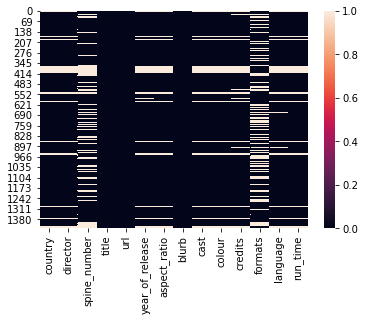

In [67]:
sns.heatmap(df.isnull())

so there are NULLs in spine_number and formats that seem largely unpatterned, whilst NULLs in other
columns appear to frequently fall on the same rows as expected. 

I believe spine number NULLs are very likely to be exclusively movies who appear in box sets rather than individually

next for the sake of QAing the data I'd like to look at some unique values

In [30]:
df.describe()

,country,director,spine_number,title,url,year_of_release,aspect_ratio,blurb,cast,colour,credits,formats,language,run_time
count,1320,1319,1071,1441,1441,1312,1314,1441,1320,1313,1276,997,1306,1321
unique,46,526,1070,1433,1441,97,34,1436,1311,10,1273,9,98,169
top,"United States,",Ingmar Bergman,88,The Killers,https://www.criterion.com/films/554-ma-tresse,1966,1.33:1,"Jean Renoir and Akira Kurosawa, two of cinema'...",Director,Color,Director Vilgot Sjoman Producer Goran Lindgren...,"Blu-Ray, DVD",English,96 minutes
freq,405,41,2,3,1,40,394,3,6,695,2,654,528,41


standing out to me here are:
- **colour** as i can't guess what other than colour or B&W could be options here
- **formats** as other than DVD and BluRay what formats are there
- **language** as i wasnt aware there existed 98 languages
- country 
- aspect_ratio 
- year_of_release


**Colour**

In [31]:
list(df.colour.unique())

['Color',
 'Black & White',
 nan,
 'Black and White/Color',
 '1.37:1',
 '2.35:1',
 '1.33:1',
 '1.85:1',
 '1.66:1',
 '1.33:1/1.78:1',
 '1.78:1']

looks like the issues are as follows:
- the aspect ratios are languages
- the colours are aspect ratios
- the languages are spine numbers
- the run time is occasionally the colour

to solve this i will:
1. set langauge to aspect ratio
2. set aspect ratio to colour
3. move run time to colour in cases where this makes sense, else set to NaN
4. set colours in the run time to NaN

this turned out to not quite be true from some further fiddling so the following edits, whilst accurate for the data arent quite what i listed above. cant be arsed to relist though so deal with it yeah.

In [97]:
colour_asp = list(df[(df.aspect_ratio.str.contains('[a-z]') == True) & (df.aspect_ratio.isin(['Black & White', 'Color']))].index)
lang_asp = list(df[(df.aspect_ratio.str.contains('[a-z]') == True) & (~df.aspect_ratio.isin(['Black & White', 'Color']))].index)

df.loc[df.index.isin(colour_asp), 'colour'] = df.loc[df.index.isin(colour_asp), 'aspect_ratio']
df.loc[df.index.isin(lang_asp), 'language'] = df.loc[df.index.isin(lang_asp), 'aspect_ratio']

df.loc[df.colour.str.contains('[a-z]') == False, 'aspect_ratio'] = df.loc[df.colour.str.contains('[a-z]') == False, 'colour']
df.loc[df.colour.str.contains('[a-z]') == False, 'colour'] = np.nan

df.loc[df.run_time.str.contains('[0-9]') == False, 'colour'] = df.loc[df.run_time.str.contains('[0-9]') == False, 'run_time']
df.loc[df.run_time.str.contains('[0-9]') == False, 'run_time'] = np.nan

df.loc[~df.language.isnull() & df.language.str.contains('Spine #'), 'language'] = np.nan
df.loc[df.language.str.contains('[a-z]') == False, 'aspect_ratio'] = df.loc[df.language.str.contains('[a-z]') == False, 'language']
df.loc[df.language.str.contains('[a-z]') == False, 'language'] = np.nan

df.loc[df.aspect_ratio.str.contains('[0-9]') == False, 'aspect_ratio'] = np.nan

so now every cell contains the correct value, so its time to start doing some cleaning. some ideas are:
- remove the pointless commas from the country of origin
- remove the word /minuets from all the run times so it can just be saved as int since theyre all given as minuets anywho
- set dtypes correctly


In [159]:
df.run_time = df.run_time.str.replace(' minutes', '').astype('float')

df.country = df.country.str.replace(',', '')

df.year_of_release = pd.to_datetime(df.year_of_release).dt.year
# looks like its gone to float anyways - because of the NAs? pandas is so dumb man wtf...


next up we'll be doing some basic feature creation, with ideas including:
- boxset yes or no
- english language yes or no
- dvd vs blu ray rather than the 8 types of dvd vs blu ray

In [178]:
df.to_csv('data/criterion_cleaned.csv', index=False)